In [5]:
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_datareader as web

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
plt.style.use('fivethirtyeight')

In [41]:
#get the dataset
df = web.DataReader('MRF.NS',data_source='yahoo',start='2012-01-01',end='2021-11-28')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-02,7040.000000,6871.100098,6980.000000,6943.049805,4210.0,6830.309570
2012-01-03,7130.000000,6950.000000,6950.000000,7069.049805,12459.0,6954.263672
2012-01-04,7100.000000,6981.000000,7090.000000,7011.500000,3368.0,6897.647949
2012-01-05,7087.549805,6915.000000,7021.000000,6956.850098,15716.0,6843.885742
2012-01-06,6999.000000,6891.000000,6930.000000,6957.750000,2814.0,6844.771484
...,...,...,...,...,...,...
2021-11-22,77899.000000,75020.000000,77842.000000,75657.601562,15725.0,75657.601562
2021-11-23,76699.000000,75093.648438,75800.000000,76501.546875,7408.0,76501.546875
2021-11-24,77397.851562,76114.148438,76654.546875,76469.546875,6410.0,76469.546875


In [42]:
#get the number of rows and columns
df.shape


(2437, 6)

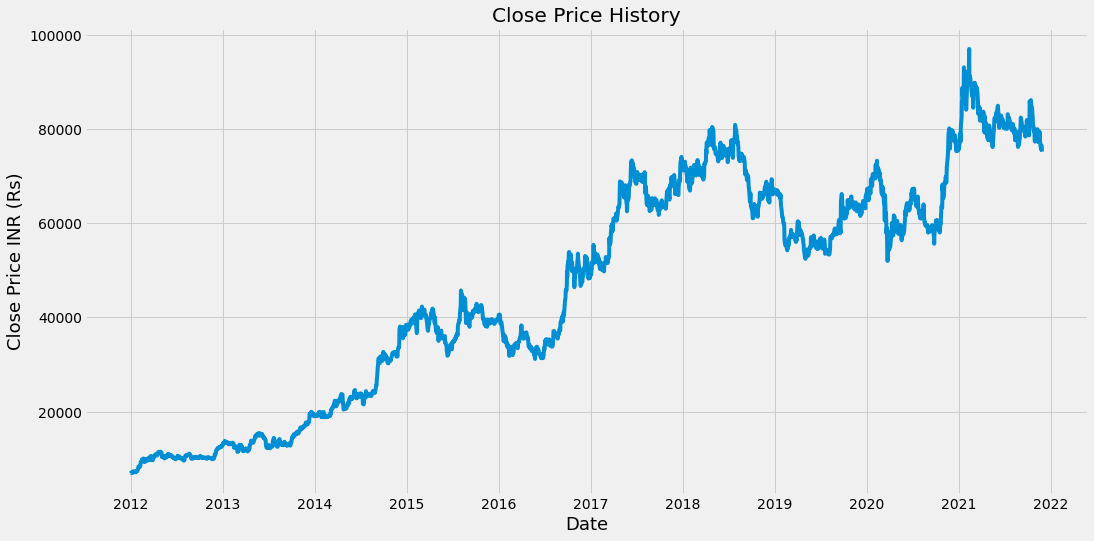

In [43]:
#visualize
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR (Rs)',fontsize=18)
plt.show()

In [44]:
#Create a new dataframe
data=df.filter(['Close'])
#Convert dataframe to a numpy array
dataset=data.values
#Get number of rows to train the model on
training_data_len=math.ceil(len(dataset)* .8)
training_data_len


1950

In [45]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data

array([[0.00000000e+00],
       [1.39952103e-03],
       [7.60297520e-04],
       ...,
       [7.72252337e-01],
       [7.63298197e-01],
       [7.58043919e-01]])

In [46]:
#Create  the training data set
#Create the scaled training data set
train_data=scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train
x_train=[]
y_train=[]

for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.        , 0.00139952, 0.0007603 , 0.00015328, 0.00016328,
       0.00034377, 0.00331664, 0.00297176, 0.00393921, 0.00353157,
       0.0031256 , 0.00376927, 0.0024064 , 0.00276294, 0.00189491,
       0.00262244, 0.0029029 , 0.00521822, 0.00498552, 0.00793507,
       0.01068246, 0.01485214, 0.01578904, 0.01376196, 0.01562132,
       0.01489157, 0.01708471, 0.01856087, 0.02597111, 0.02738452,
       0.02765887, 0.03214067, 0.030524  , 0.03142869, 0.03446432,
       0.02741451, 0.02935218, 0.02763276, 0.02617493, 0.03048346,
       0.03239003, 0.03126152, 0.03312034, 0.02987533, 0.02932385,
       0.02917613, 0.03193574, 0.03432214, 0.03652583, 0.03493804,
       0.03413832, 0.03217399, 0.03067118, 0.03061564, 0.04037396,
       0.03473256, 0.03279766, 0.03041459, 0.03245723, 0.03286931])]
[0.030330179641969546]

[array([0.        , 0.00139952, 0.0007603 , 0.00015328, 0.00016328,
       0.00034377, 0.00331664, 0.00297176, 0.00393921, 0.00353157,
       0.0031256 , 0.00376927, 0.0

In [47]:
x_train,y_train = np.array(x_train),np.array(y_train)


In [48]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1890, 60, 1)

In [49]:
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [50]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [51]:
model.fit(x_train,y_train,batch_size=1,epochs=1)

1890/1890 [==============================] - 64s 33ms/step - loss: 0.0010


In [52]:
test_data = scaled_data[training_data_len -60:,:]
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])
    

In [53]:
x_test=np.array(x_test)

In [54]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [55]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)

In [56]:
rnse = np.sqrt(np.mean(predictions - y_test)**2)
rnse

1439.6569799152978

C:\Users\Reina\AppData\Local\Temp/ipykernel_9344/3013137332.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


<function matplotlib.pyplot.show(close=None, block=None)>

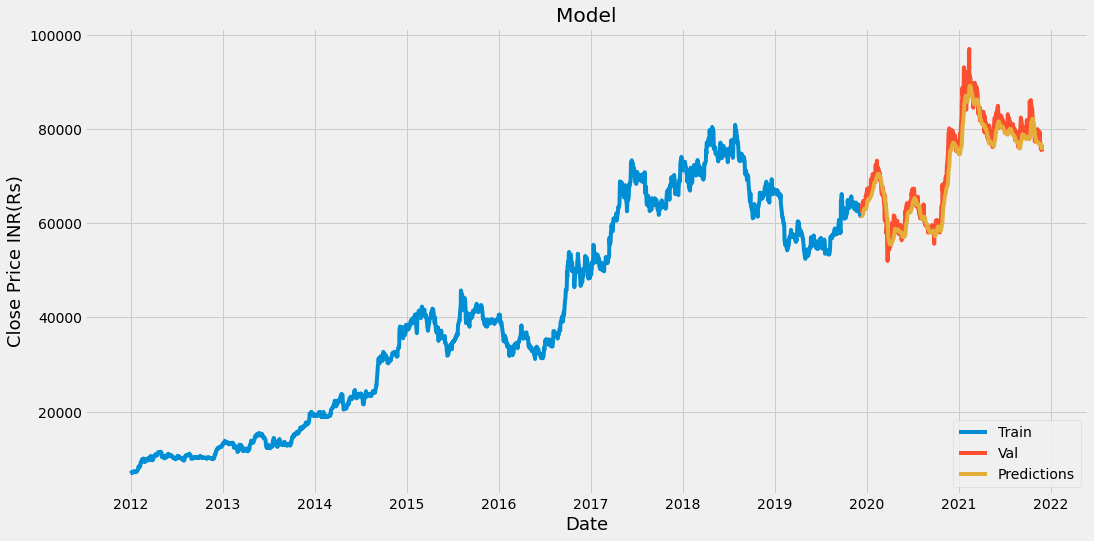

In [57]:
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price INR(Rs)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'], loc='lower right')
plt.show

In [58]:
valid

,Close,Predictions
Date,,
2019-12-10,62070.101562,61645.871094
2019-12-11,62050.199219,61564.718750
2019-12-12,62692.101562,61504.777344
2019-12-13,63926.351562,61533.566406
2019-12-16,64254.250000,61737.910156
...,...,...
2021-11-22,75657.601562,76812.039062
2021-11-23,76501.546875,76483.757812
2021-11-24,76469.546875,76164.796875


In [60]:
mrf_quote=web.DataReader('MRF.NS',data_source='yahoo',start='2012-01-01',end='2021-11-26')
new_df=mrf_quote.filter(['Close'])
last_60_days=new_df[-60:].values
last_60_days_scaled=scaler.transform(last_60_days)
X_test=[]
X_test.append(last_60_days_scaled)
X_test =np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred_price=model.predict(X_test)
pred_price=scaler.inverse_transform(pred_price)
print(pred_price)


[[75195.84]]


In [37]:
mrf_quote2=web.DataReader('MRF.NS',data_source='yahoo',start='2021-11-26',end='2021-11-28')
print(mrf_quote2['Close'])

Date
2021-11-26    75190.351562
Name: Close, dtype: float64
